In [2]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import io

## Predict startup acquisition/ipo valuation amount based on funding history, individual background, industry, and other factors.

In [4]:
#accessing data via github
url1 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/acquisitions.csv"
download1 = requests.get(url1).content
url2 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/degrees.csv"
download2 = requests.get(url2).content
url3 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/funding_rounds.csv"
download3 = requests.get(url3).content
url4 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/funds.csv"
download4 = requests.get(url4).content
url5 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/investments.csv"
download5 = requests.get(url5).content
url6 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/ipos.csv"
download6 = requests.get(url6).content
url7 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/offices.csv"
download7 = requests.get(url7).content
url8 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/people.csv"
download8 = requests.get(url8).content
url9 = "https://raw.githubusercontent.com/kirkhach/startup-ecosystem-analysis/main/data/relationships.csv"
download9 = requests.get(url9).content

#load in the data
acqs = pd.read_csv(io.StringIO(download1.decode('utf-8')))
degs = pd.read_csv(io.StringIO(download2.decode('utf-8')))
rounds = pd.read_csv(io.StringIO(download3.decode('utf-8')))
funds = pd.read_csv(io.StringIO(download4.decode('utf-8')))
invs = pd.read_csv(io.StringIO(download5.decode('utf-8')))
ipos = pd.read_csv(io.StringIO(download6.decode('utf-8')))
ofcs = pd.read_csv(io.StringIO(download7.decode('utf-8')))
ppl = pd.read_csv(io.StringIO(download8.decode('utf-8')))
relns = pd.read_csv(io.StringIO(download9.decode('utf-8')))


#too large for github....may need to use git lfs
objs = pd.read_csv('/Users/kirk.hachigian/Desktop/21SpringClasses/3120/Project/objects.csv')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3156: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
#response variable for each company = ipo valuation or acquisition price
Y1 = objs.merge(acqs,left_on='id',right_on='acquired_object_id')
Y1 = Y1[['id_x','name','price_amount']]
#Y1 = Y1[Y1['price_amount']!=0.0]
Y1.columns = ['id','name','valuation']

Y2 = objs.merge(ipos,left_on='id',right_on='object_id')
Y2 = Y2[['id_x','name','valuation_amount']]
Y2 = Y2[Y2['valuation_amount']!=0.0]
Y2.columns = ['id','name','valuation']

Y = Y1.append(Y2)
Y.reset_index(inplace=True, drop=True)
Y

,id,name,valuation
0,c:10,Flektor,2.000000e+07
1,c:100,There,0.000000e+00
2,c:1001,FriendFeed,4.750000e+07
3,c:10014,Mobclix,0.000000e+00
4,c:100265,Coastal Supply Company,0.000000e+00
...,...,...,...
9646,c:7872,Mixi,9.700000e+08
9647,c:8530,QlikTech,1.000000e+09
9648,c:9580,Pironet,4.400000e+07
9649,c:959,Zillow,2.550000e+09


In [7]:
#create df listing person id, name, company id, title, degree type, subject, institution only 
#for companies in response
df1 = ppl.merge(degs, on='object_id')
df3 = df1[['object_id','first_name','last_name','degree_type','subject','institution']]
df4 = df3.merge(relns, left_on='object_id',right_on='person_object_id')
df5 = df4[['person_object_id','first_name','last_name','relationship_object_id','title','degree_type','subject','institution']]
df5.columns=['person_id','first_name','last_name','company_id','title','degree_type','degree_subject','institution']
df6 = df5[df5['company_id'].isin(list(Y['id']))]
df6.reset_index(inplace=True, drop=True)

In [8]:
df6

,person_id,first_name,last_name,company_id,title,degree_type,degree_subject,institution
0,p:6,Kevin,Rose,c:81,Co-founder,NaN,NaN,"University of Nevada, Las Vegas"
1,p:6,Kevin,Rose,c:82,Co-Founder,NaN,NaN,"University of Nevada, Las Vegas"
2,p:6,Kevin,Rose,c:22827,Founder,NaN,NaN,"University of Nevada, Las Vegas"
3,p:6,Kevin,Rose,c:9068,Advisor,NaN,NaN,"University of Nevada, Las Vegas"
4,p:6,Kevin,Rose,c:445,Advisor,NaN,NaN,"University of Nevada, Las Vegas"
...,...,...,...,...,...,...,...,...
37210,p:268360,Darryl,M. Fraser,c:64809,Vice President of Communications for TRWs Aer...,Bachelors Degree,Chemical Engineering,Massachusetts Institute of Technology
37211,p:268360,Darryl,M. Fraser,c:64809,Director of Communications for TRWs Space and...,MBA,NaN,University of California
37212,p:268360,Darryl,M. Fraser,c:64809,Vice President of Communications for TRWs Aer...,MBA,NaN,University of California
37213,p:268516,Jonathan,Taub,c:7389,Director of Business Development,BS,finance,"Wharton School of Business , University of Pen..."


In [9]:
#issue: people are duplicated for each of their degrees (i.e. undergrad & mba)
X = df6[df6['person_id']=='p:266137']
X

,person_id,first_name,last_name,company_id,title,degree_type,degree_subject,institution
37053,p:266137,Ryan,E. Bateman,c:48273,Director of Sales and Trading Applications,MBA,International Business,Georgetown University
37054,p:266137,Ryan,E. Bateman,c:48273,Director of Sales and Trading Applications,BA,English Studies,Northwestern University


In [10]:
#create df listing company id, name, category, country, state, city, funding round, total funding amount only
#for companies in the response Y
dfa = objs[objs['entity_type']=='Company']
dfa = dfa[['id','name','category_code','country_code','state_code','city','funding_rounds','funding_total_usd']]
dfb = dfa[dfa['id'].isin(list(Y['id']))]
dfb.reset_index(inplace=True, drop=True)

In [11]:
dfb

,id,name,category_code,country_code,state_code,city,funding_rounds,funding_total_usd
0,c:10,Flektor,games_video,USA,CA,Culver City,0,0.0
1,c:100,There,games_video,USA,CA,San Mateo,0,0.0
2,c:1001,FriendFeed,web,USA,CA,Mountain View,1,5000000.0
3,c:10014,Mobclix,mobile,USA,CA,Palo Alto,1,0.0
4,c:100265,Coastal Supply Company,NaN,NaN,NaN,NaN,0,0.0
...,...,...,...,...,...,...,...,...
9488,c:9949,PPTV,games_video,CHN,NaN,Shanghai,4,286500000.0
9489,c:99685,Symbyo Dental,biotech,NaN,NaN,NaN,1,500000.0
9490,c:997,Zimbra,enterprise,USA,CA,Palo Alto,1,14500000.0
9491,c:99737,HyperCube,public_relations,USA,TX,Lancaster,0,0.0


In [12]:
#create df with company id, funding round type, funding round amount
dfx = rounds[rounds['object_id'].isin(list(Y['id']))]
dfx = dfx[['object_id','funding_round_code','raised_amount_usd','participants']]
dfx.columns = ['id','funding_round_code','funding_round_amount','participants']
dfx.reset_index(inplace=True, drop=True)

In [13]:
dfx

,id,funding_round_code,funding_round_amount,participants
0,c:4,b,8500000.0,2
1,c:5,angel,500000.0,2
2,c:5,a,12700000.0,3
3,c:5,b,27500000.0,4
4,c:7299,b,10500000.0,2
...,...,...,...,...
5139,c:84079,unattributed,314960000.0,0
5140,c:62,unattributed,7755032.0,0
5141,c:73064,partial,1392000.0,0
5142,c:29130,unattributed,41750000.0,0


In [14]:
#initial visualization plots

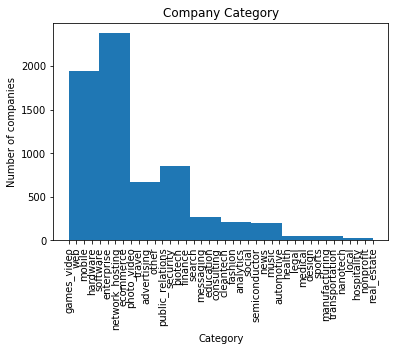

In [29]:
dfba = dfb['category_code']
clean_dfba = [x for x in dfba if str(x) != 'nan']

plt.hist(clean_dfba)
plt.xticks(rotation='vertical')
plt.title('Company Category')
plt.ylabel('Number of companies'), plt.xlabel('Category')
plt.show()